In [1]:
!pip install datasets huggingface_hub numpy tqdm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 586.4 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 700.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.3/506.3 kB 5.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 7.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 937.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 1.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 3.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 MB 17.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.

In [2]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import datasets, transformers, torch, evaluate, seqeval
print("datasets:", datasets.__version__)
print("transformers:", transformers.__version__)
print("torch:", torch.__version__)

ModuleNotFoundError: No module named 'transformers'

In [2]:
%pip install -U transformers timm pillow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 32.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.9/789.9 kB 7.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 9.7 MB/s  0:01:176m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 8.1 MB/s  0:00:57m0:00:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 13.0 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 14.9 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 6.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 13.5 MB/s  0:00:46m0:00:0100:

In [3]:
from datasets import load_dataset, Dataset
from collections import defaultdict, Counter
from pathlib import Path
import os, random, time

# ---------- CONFIG ----------
STRATEGY = "dominant_category"   # balance by layout class
SIZES = {"train": 300, "validation": 100, "test": 100}  # reduced sizes for speed
SAVE_DIR = Path("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout")
INCLUDE_IMAGES = False     # disable image streaming to speed up
SEED = 42
# ----------------------------

os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"
random.seed(SEED)

ID2NAME = {
    1: "CAPTION",
    2: "FOOTNOTE",
    3: "FORMULA",
    4: "LIST-ITEM",
    5: "PAGE-FOOTER",
    6: "PAGE-HEADER",
    7: "PICTURE",
    8: "SECTION-HEADER",
    9: "TABLE",
    10: "TEXT",
    11: "TITLE",
}

def get_dominant_label(example):
    cats = example["category_id"]
    if not cats:
        return "NONE"
    cid = Counter(cats).most_common(1)[0][0]  # cid is 1..11 in DocLayNet
    return ID2NAME.get(cid, f"ID_{cid}")

def stream_balanced_layout(split_name, n_samples, include_images=False):
    """Stream a balanced subset by dominant layout label."""
    print(f"[i] Streaming {split_name} split for dominant layout class balancing...")
    t0 = time.time()

    # Discover which classes appear early in the stream (reduced peek)
    peek = load_dataset("ds4sd/DocLayNet-v1.2", split=split_name, streaming=True)
    seen = set()
    for i, ex in enumerate(peek):
        seen.add(get_dominant_label(ex))
        if i >= 500:  # reduced from 2000
            break
    classes = sorted([c for c in seen if c != "NONE"])
    print(f"   ↳ Found {len(classes)} layout classes: {classes}")

    # Allocate equal quotas per layout class
    k = len(classes)
    base, rem = divmod(n_samples, k)
    quotas = {c: base for c in classes}
    for c in classes[:rem]:
        quotas[c] += 1

    # Stream again and collect until quotas met, with early breaks
    stream = load_dataset("ds4sd/DocLayNet-v1.2", split=split_name, streaming=True)
    buckets = defaultdict(list)
    total = 0
    filled_classes = set()

    for ex in stream:
        lab = get_dominant_label(ex)
        if lab in quotas and lab not in filled_classes:
            if len(buckets[lab]) < quotas[lab]:
                buckets[lab].append(ex)
                total += 1
                if len(buckets[lab]) >= quotas[lab]:
                    filled_classes.add(lab)
                if total >= n_samples:
                    break
        if len(filled_classes) == len(quotas):
            break

    # Convert to lightweight Dataset
    keep_cols = ["metadata", "bboxes", "category_id", "segmentation", "area", "pdf_cells"]
    if include_images:
        keep_cols.insert(0, "image")

    records = [
        {k: ex[k] for k in keep_cols if k in ex}
        for c in classes for ex in buckets[c]
    ]

    ds = Dataset.from_list(records)

    print(f"   ✅ Collected {len(ds)} samples in {time.time()-t0:.1f}s")
    print("   ↳ Layout distribution:", Counter([get_dominant_label(r) for r in records]))
    return ds

def main():
    SAVE_DIR.mkdir(parents=True, exist_ok=True)
    for split, n in SIZES.items():
        ds_bal = stream_balanced_layout(split, n, include_images=INCLUDE_IMAGES)
        out = SAVE_DIR / split
        ds_bal.save_to_disk(out)
        print(f"   💾 Saved {split} subset to {out.resolve()}")
    print("\n[✔] Balanced subsets (by layout class) saved successfully!")

if __name__ == "__main__":
    main()

[i] Streaming train split for dominant layout class balancing...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

   ↳ Found 10 layout classes: ['CAPTION', 'FOOTNOTE', 'LIST-ITEM', 'PAGE-FOOTER', 'PAGE-HEADER', 'PICTURE', 'SECTION-HEADER', 'TABLE', 'TEXT', 'TITLE']


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

   ✅ Collected 300 samples in 750.4s
   ↳ Layout distribution: Counter({'CAPTION': 30, 'FOOTNOTE': 30, 'LIST-ITEM': 30, 'PAGE-FOOTER': 30, 'PAGE-HEADER': 30, 'PICTURE': 30, 'SECTION-HEADER': 30, 'TABLE': 30, 'TEXT': 30, 'TITLE': 30})


Saving the dataset (0/1 shards):   0%|          | 0/300 [00:00<?, ? examples/s]

   💾 Saved train subset to /home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/train
[i] Streaming validation split for dominant layout class balancing...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

   ↳ Found 10 layout classes: ['CAPTION', 'FOOTNOTE', 'LIST-ITEM', 'PAGE-FOOTER', 'PAGE-HEADER', 'PICTURE', 'SECTION-HEADER', 'TABLE', 'TEXT', 'TITLE']


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

   ✅ Collected 97 samples in 280.9s
   ↳ Layout distribution: Counter({'CAPTION': 10, 'LIST-ITEM': 10, 'PAGE-FOOTER': 10, 'PAGE-HEADER': 10, 'PICTURE': 10, 'SECTION-HEADER': 10, 'TABLE': 10, 'TEXT': 10, 'TITLE': 10, 'FOOTNOTE': 7})


Saving the dataset (0/1 shards):   0%|          | 0/97 [00:00<?, ? examples/s]

   💾 Saved validation subset to /home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/validation
[i] Streaming test split for dominant layout class balancing...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

   ↳ Found 9 layout classes: ['CAPTION', 'LIST-ITEM', 'PAGE-FOOTER', 'PAGE-HEADER', 'PICTURE', 'SECTION-HEADER', 'TABLE', 'TEXT', 'TITLE']


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

   ✅ Collected 100 samples in 202.9s
   ↳ Layout distribution: Counter({'CAPTION': 12, 'LIST-ITEM': 11, 'PAGE-FOOTER': 11, 'PAGE-HEADER': 11, 'PICTURE': 11, 'SECTION-HEADER': 11, 'TABLE': 11, 'TEXT': 11, 'TITLE': 11})


Saving the dataset (0/1 shards):   0%|          | 0/100 [00:00<?, ? examples/s]

   💾 Saved test subset to /home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/test

[✔] Balanced subsets (by layout class) saved successfully!


In [3]:
!df -h /

Filesystem      Size  Used Avail Use% Mounted on
/dev/sda2       916G  868G  1.7G 100% /


In [2]:
#!rm -rf /home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout

In [6]:
from datasets import load_from_disk
from collections import Counter

train = load_from_disk("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/train")
val   = load_from_disk("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/validation")
test  = load_from_disk("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/test")

print("Train:", len(train), "Validation:", len(val), "Test:", len(test))

labs = [ex["metadata"]["doc_category"] for ex in train]
print("Train label distribution:", Counter(labs))


Train: 300 Validation: 97 Test: 100
Train label distribution: Counter({'financial_reports': 300})


In [ ]:
from datasets import load_dataset, load_from_disk, Dataset
from collections import defaultdict
from pathlib import Path
import os

# Base directory for your saved annotation-only subsets and images
BASE_PATH = Path("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout")
IMAGE_ROOT = BASE_PATH / "images"

def load_annotation_subset(split_name):
    subset_path = BASE_PATH / split_name
    return load_from_disk(subset_path)

def get_metadata_keys(dataset):
    return {tuple(sorted(meta.items())) for meta in dataset["metadata"]}

def save_image_file(pil_img, image_path):
    image_path.parent.mkdir(parents=True, exist_ok=True)  # ensure directory exists
    pil_img.save(image_path)

def download_images_for_subset(split_name, include_images=True):
    print(f"[i] Downloading images for {split_name} subset...")
    ann_subset = load_annotation_subset(split_name)
    meta_keys = get_metadata_keys(ann_subset)

    stream = load_dataset("ds4sd/DocLayNet-v1.2", split=split_name, streaming=True)
    records_with_images = []

    # Map metadata to index for easy file naming and path mapping
    ann_dict = {tuple(sorted(meta.items())): i for i, meta in enumerate(ann_subset["metadata"])}

    # Initialize image paths list same length as ann_subset
    image_paths = [None] * len(ann_subset)

    for sample in stream:
        sample_key = tuple(sorted(sample["metadata"].items()))
        if sample_key in meta_keys:
            idx = ann_dict.get(sample_key)
            if idx is None:
                continue

            # Save image file for this sample
            img_dir = IMAGE_ROOT / split_name
            img_path = img_dir / f"{idx}.png"
            save_image_file(sample["image"], img_path)

            image_paths[idx] = str(img_path)
            meta_keys.remove(sample_key)  # Optional: speeds up lookup

            if not meta_keys:
                break  # Got all images

    print(f"   ✅ Saved {sum(p is not None for p in image_paths)} images to disk.")

    # Add new "image_path" column to annotation dataset
    ann_subset = ann_subset.add_column("image_path", image_paths)

    # Save annotated dataset with image paths
    out_dir = BASE_PATH / f"{split_name}_with_images"
    ann_subset.save_to_disk(out_dir)
    print(f"   💾 Saved {split_name} dataset with image paths to {out_dir}")

    return ann_subset

# Example usage to download images for each split and map paths
for split in ["train", "validation", "test"]:
    download_images_for_subset(split)

2025-10-18 21:04:49.527510: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-18 21:04:49.650178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from datasets import load_from_disk
from pathlib import Path
import os

BASE_PATH = Path("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout")
split_name = "train_with_images"  # dataset with images paths saved
ds_path = BASE_PATH / split_name
IMAGE_ROOT = BASE_PATH / "images" / split_name.replace("_with_images", "")

dataset = load_from_disk(ds_path)
print(f"Loaded {len(dataset)} samples with image paths.")

# Function to check correspondence of metadata keys with image files
def check_metadata_image_consistency(dataset, image_root):
    mismatches = 0
    for idx, sample in enumerate(dataset):
        meta = sample["metadata"]
        image_path = sample.get("image_path", None)

        # Expected image path based on naming (index.png)
        expected_image_path = image_root / f"{idx}.png"

        if image_path is None:
            print(f"[Warning] Sample {idx} has no image_path.")
            mismatches += 1
            continue

        # Check if image path matches expected path
        if Path(image_path).resolve() != expected_image_path.resolve():
            print(f"[Mismatch] Sample {idx} image_path differs from expected path:")
            print(f"  image_path: {image_path}")
            print(f"  expected:   {expected_image_path}")
            mismatches += 1

        # Check if image file actually exists
        if not os.path.exists(image_path):
            print(f"[Missing] Image file not found for sample {idx} at {image_path}")
            mismatches += 1

    if mismatches == 0:
        print("✅ All metadata keys correspond correctly to image files.")
    else:
        print(f"⚠ Found {mismatches} mismatches or missing images.")

check_metadata_image_consistency(dataset, IMAGE_ROOT)


Loaded 300 samples with image paths.
✅ All metadata keys correspond correctly to image files.


In [12]:
from datasets import load_from_disk
from pathlib import Path
import os

BASE_PATH = Path("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout")
split_name = "train_with_images"
ds_path = BASE_PATH / split_name
IMAGE_ROOT = BASE_PATH / "images" / split_name.replace("_with_images", "")

dataset = load_from_disk(ds_path)
print(f"Loaded {len(dataset)} samples with image paths.")

def check_metadata_image_consistency_partial(dataset, image_root, num_samples=5):
    mismatches = 0
    for idx, sample in enumerate(dataset):
        if idx >= num_samples:
            break
        meta = sample["metadata"]
        image_path = sample.get("image_path", None)

        expected_image_path = image_root / f"{idx}.png"

        print(f"Sample {idx}:")
        print(f"  Metadata: {meta}")
        print(f"  Image path: {image_path}")
        print(f"  Expected path: {expected_image_path}")

        if image_path is None:
            print(f"  [Warning] No image path for sample {idx}")
            mismatches += 1
            continue

        if Path(image_path).resolve() != expected_image_path.resolve():
            print(f"  [Mismatch] Image path does not match expected path.")
            mismatches += 1

        if not os.path.exists(image_path):
            print(f"  [Missing] Image file not found on disk.")
            mismatches += 1
        else:
            print(f"  [OK] Image file found.")

    if mismatches == 0:
        print(f"\n✅ All {num_samples} samples passed consistency check.")
    else:
        print(f"\n⚠ Found {mismatches} issues in first {num_samples} samples.")

check_metadata_image_consistency_partial(dataset, IMAGE_ROOT, num_samples=5)

Loaded 300 samples with image paths.
Sample 0:
  Metadata: {'coco_height': 1025, 'coco_width': 1025, 'collection': 'ann_reports_00_04_fancy', 'doc_category': 'financial_reports', 'image_id': 16, 'num_pages': 68, 'original_filename': 'NYSE_SKT_2003.pdf', 'original_height': 792.0, 'original_width': 612.0, 'page_hash': 'd1b79bd332e42e0a1e633aee4848a15a6b155877fe30da7a471b4130d6f04ee5', 'page_no': 66}
  Image path: /home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/images/train/0.png
  Expected path: /home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout/images/train/0.png
  [OK] Image file found.
Sample 1:
  Metadata: {'coco_height': 1025, 'coco_width': 1025, 'collection': 'ann_reports_00_04_fancy', 'doc_category': 'financial_reports', 'image_id': 182, 'num_pages': 16, 'original_filename': 'NASDAQ_CAKE_2003.pdf', 'original_height': 774.0, 'original_width': 594.0, 'page_hash': '0a85e1e1777d879354ab863ae88276f192b17e804e64d276cde5e6575781cbea', 'page_no': 2}
  Image path

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Streamed sample metadata:
{'coco_height': 1025, 'coco_width': 1025, 'collection': 'ann_reports_00_04_fancy', 'doc_category': 'financial_reports', 'image_id': 0, 'num_pages': 100, 'original_filename': 'NYSE_F_2004.pdf', 'original_height': 783.0, 'original_width': 612.0, 'page_hash': 'c6effb847ae7e4a80431696984fa90c98bb08c266481b9a03842422459c43bdd', 'page_no': 72}
Matching sample index in annotation subset: 240
Streamed sample image size: (1025, 1025)


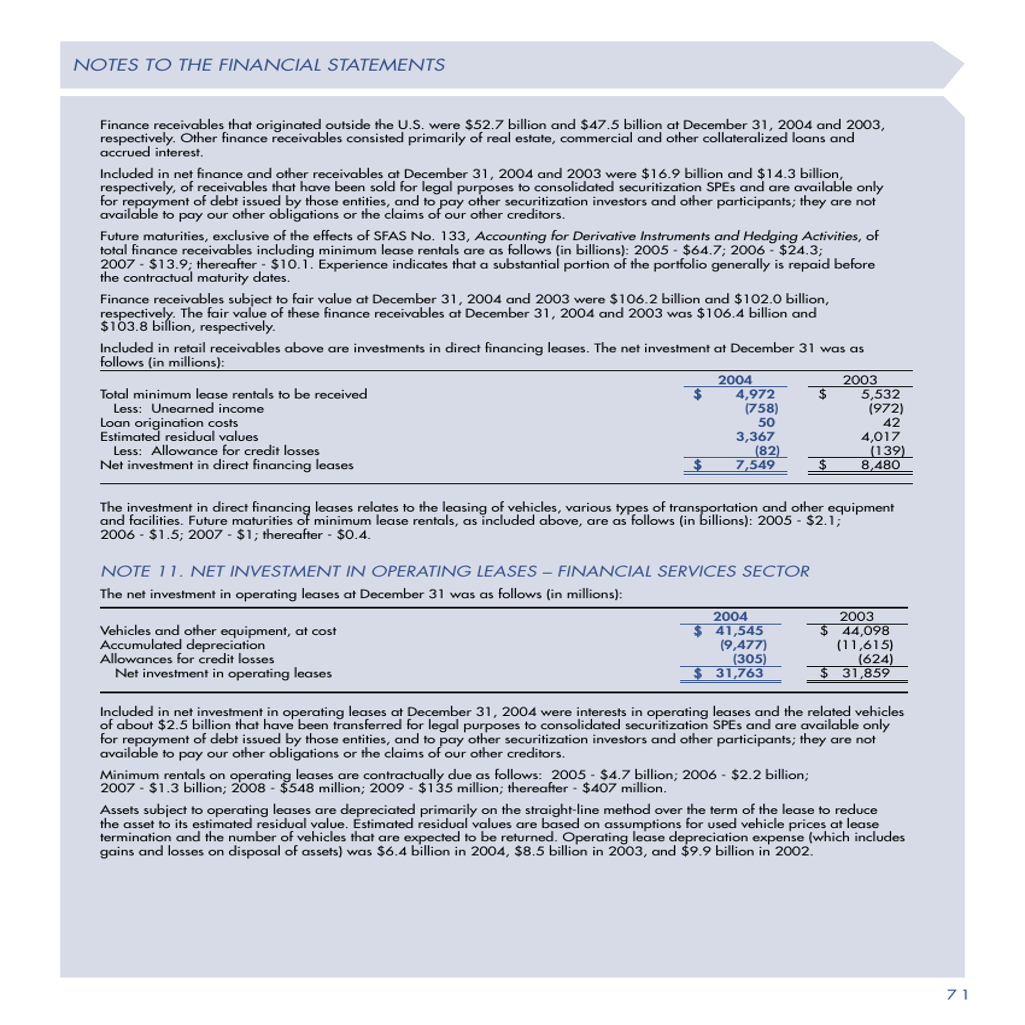

Saved image size: (1025, 1025)


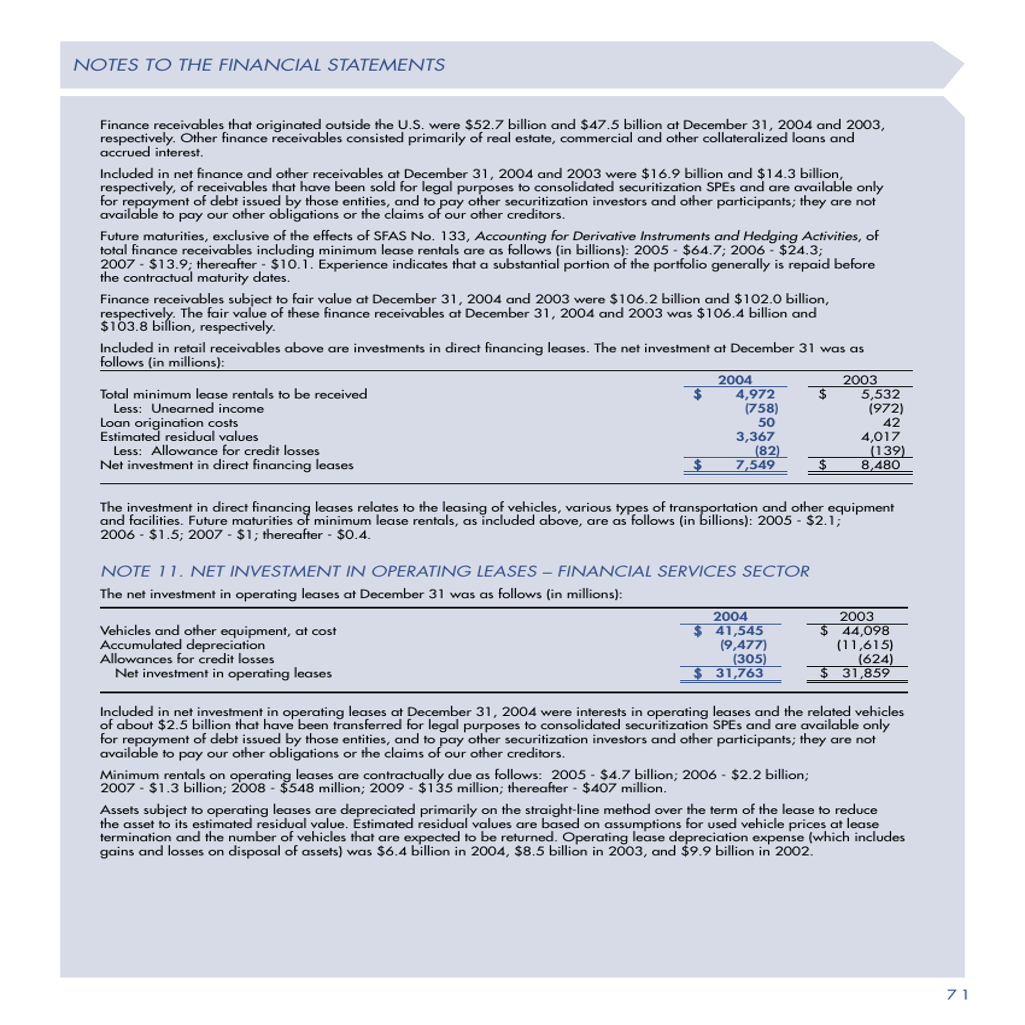

In [14]:
from datasets import load_dataset, load_from_disk
from PIL import Image
import os

BASE_PATH = "/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout"
split_name = "train"
saved_with_images_split = f"{split_name}_with_images"

# Load saved annotation dataset with image paths
ann_subset = load_from_disk(f"{BASE_PATH}/{saved_with_images_split}")

# Stream 1 sample from original dataset with images
stream = load_dataset("ds4sd/DocLayNet-v1.2", split=split_name, streaming=True)
sample_streamed = next(iter(stream))

sample_index = 0  # choose which sample index you want to compare

# Get metadata to locate matching sample in ann_subset
streamed_metadata = sample_streamed["metadata"]
print(f"Streamed sample metadata:\n{streamed_metadata}")

# Find matching sample in annotation subset by metadata:
match_idx = None
for i, meta in enumerate(ann_subset["metadata"]):
    if meta == streamed_metadata:
        match_idx = i
        break

if match_idx is None:
    print("No matching sample found in annotation subset.")
else:
    print(f"Matching sample index in annotation subset: {match_idx}")

    # Open streamed sample image
    img_streamed = sample_streamed["image"]
    print(f"Streamed sample image size: {img_streamed.size}")
    display(img_streamed)

    # Open saved image from disk for annotation subset
    img_path = ann_subset[match_idx]["image_path"]
    if img_path and os.path.exists(img_path):
        img_saved = Image.open(img_path)
        print(f"Saved image size: {img_saved.size}")
        display(img_saved)
    else:
        print("Saved image path not found or does not exist.")

In [1]:
#downloading more dataset with giving priority to minor classes

# build_balanced_doclaynet.py
from datasets import load_dataset, Dataset
from collections import defaultdict, Counter
from pathlib import Path
import os, random, time, math

# ======= CONFIG =======
STRATEGY = "dominant_category_invfreq"   # inverse-frequency balancing by dominant class
SIZES = {"train": 5000, "validation": 2000, "test": 3000}  # <-- your sizes
SAVE_DIR = Path("/home/jupyter-24251d5803/DLS_dataset/DocLayNet-Balanced-Layout-new")
INCLUDE_IMAGES = True                     # download images too
SEED = 42

# Peek more for better class estimates when sampling bigger splits
N_PEEK = 20000
ALPHA = 0.8                               # strength of minority boost (0.5–1.2 reasonable)
MIN_SHARE = 0.03                          # minimum share per class
EXTRA_BOOST = {
    "CAPTION": 1.5,
    "FOOTNOTE": 1.5,
    "FORMULA": 1.7,
    "PAGE-FOOTER": 1.4,
    "PAGE-HEADER": 1.4,
    "SECTION-HEADER": 1.3,
    "TABLE": 1.6,
    "TITLE": 1.3,
}
# ======================

os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"
random.seed(SEED)

ID2NAME = {
    1: "CAPTION", 2: "FOOTNOTE", 3: "FORMULA", 4: "LIST-ITEM",
    5: "PAGE-FOOTER", 6: "PAGE-HEADER", 7: "PICTURE", 8: "SECTION-HEADER",
    9: "TABLE", 10: "TEXT", 11: "TITLE",
}

def get_dominant_label(example):
    cats = example.get("category_id") or []
    if not cats:
        return "NONE"
    cid = Counter(cats).most_common(1)[0][0]
    return ID2NAME.get(cid, f"ID_{cid}")

def estimate_class_freq(split_name: str, n_peek: int):
    stream = load_dataset("ds4sd/DocLayNet-v1.2", split=split_name, streaming=True)
    counts = Counter()
    for i, ex in enumerate(stream):
        lab = get_dominant_label(ex)
        if lab != "NONE":
            counts[lab] += 1
        if i + 1 >= n_peek:
            break
    classes = sorted(counts.keys())
    total = sum(counts.values()) or 1
    freqs = {c: counts[c] / total for c in classes}
    return classes, counts, freqs

def quotas_from_inverse_freq(classes, counts, freqs, n_samples: int):
    weights = {}
    for c in classes:
        inv = 1.0 / (counts[c] + 1.0)
        w = (inv ** ALPHA) * EXTRA_BOOST.get(c, 1.0)
        weights[c] = w

    k = max(1, len(classes))
    min_quota_each = max(1, int(math.floor(n_samples * MIN_SHARE)))
    if k * min_quota_each > n_samples:
        min_quota_each = max(1, n_samples // k)

    guaranteed = {c: min_quota_each for c in classes}
    remainder = max(0, n_samples - sum(guaranteed.values()))
    wsum = sum(weights.values()) or 1.0
    provisional = {c: int(math.floor(remainder * (weights[c] / wsum))) for c in classes}
    gap = n_samples - (sum(guaranteed.values()) + sum(provisional.values()))
    if gap > 0:
        ideals = {c: remainder * (weights[c] / wsum) for c in classes}
        order = sorted(classes, key=lambda c: ideals[c] - provisional[c], reverse=True)
        for c in order[:gap]:
            provisional[c] += 1
    return {c: guaranteed[c] + provisional[c] for c in classes}

def stream_balanced_layout(split_name, n_samples, include_images=False):
    print(f"[i] Streaming {split_name} with inverse-frequency balancing...")
    t0 = time.time()

    classes, counts, freqs = estimate_class_freq(split_name, N_PEEK)
    if not classes:
        raise RuntimeError("No classes discovered during peek; check dataset access.")
    print(f"   ↳ Discovered {len(classes)} classes after peeking {N_PEEK}: {classes}")
    print(f"   ↳ Peek counts: {dict(counts)}")

    quotas = quotas_from_inverse_freq(classes, counts, freqs, n_samples)
    print(f"   ↳ Target quotas per class (sum={sum(quotas.values())}): {quotas}")

    stream = load_dataset("ds4sd/DocLayNet-v1.2", split=split_name, streaming=True)
    buckets = defaultdict(list)
    total = 0
    filled = set()

    keep_cols = ["metadata", "bboxes", "category_id", "segmentation", "area", "pdf_cells"]
    if include_images:
        keep_cols.insert(0, "image")

    for ex in stream:
        lab = get_dominant_label(ex)
        if lab in quotas and lab not in filled:
            if len(buckets[lab]) < quotas[lab]:
                rec = {k: ex[k] for k in keep_cols if k in ex}
                if include_images and "image" not in rec:
                    continue
                buckets[lab].append(rec)
                total += 1
                if len(buckets[lab]) >= quotas[lab]:
                    filled.add(lab)
                if total >= n_samples:
                    break
        if len(filled) == len(quotas):
            break

    records = []
    for c in classes:
        records.extend(buckets[c])

    ds = Dataset.from_list(records)
    actual = Counter(get_dominant_label(r) for r in records)
    print(f"   ✅ Collected {len(ds)} samples in {time.time()-t0:.1f}s")
    print(f"   ↳ Actual layout distribution: {dict(actual)}")
    return ds

def main():
    SAVE_DIR.mkdir(parents=True, exist_ok=True)
    for split, n in SIZES.items():
        ds_bal = stream_balanced_layout(split, n, include_images=INCLUDE_IMAGES)
        out = SAVE_DIR / split
        ds_bal.save_to_disk(out)
        print(f"   💾 Saved {split} subset to {out.resolve()}\n")
    print("[✔] Balanced subsets (minority-favored + images) saved successfully!")

if __name__ == "__main__":
    main()

[i] Streaming train with inverse-frequency balancing...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

   ↳ Discovered 11 classes after peeking 20000: ['CAPTION', 'FOOTNOTE', 'FORMULA', 'LIST-ITEM', 'PAGE-FOOTER', 'PAGE-HEADER', 'PICTURE', 'SECTION-HEADER', 'TABLE', 'TEXT', 'TITLE']
   ↳ Peek counts: {'TEXT': 14278, 'PAGE-HEADER': 720, 'TABLE': 416, 'SECTION-HEADER': 1921, 'CAPTION': 100, 'FOOTNOTE': 30, 'LIST-ITEM': 1108, 'PICTURE': 795, 'TITLE': 119, 'PAGE-FOOTER': 386, 'FORMULA': 17}
   ↳ Target quotas per class (sum=5000): {'CAPTION': 485, 'FOOTNOTE': 1011, 'FORMULA': 1658, 'LIST-ITEM': 183, 'PAGE-FOOTER': 256, 'PAGE-HEADER': 215, 'PICTURE': 193, 'SECTION-HEADER': 177, 'TABLE': 265, 'TEXT': 154, 'TITLE': 403}


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

KeyboardInterrupt: 